# K means from scratch

## Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import operator
%matplotlib inline

## Utils

### Plot data

In [2]:
def plot_data(centroids, data, n_samples):
    colour = plt.cm.rainbow(np.linspace(0,1,len(centroids)))
    for i, centroid in enumerate(centroids):
        samples = data[i*n_samples:(i+1)*n_samples]
        plt.scatter(samples[:,0], samples[:,1], c=colour[i], s=1)
        plt.plot(centroid[0], centroid[1], markersize=10, marker="x", color='k', mew=5)
        plt.plot(centroid[0], centroid[1], markersize=5, marker="x", color='m', mew=2)

## K means clustering model

In [3]:
class K_means():
    
    def __init__(self, data, num_clusters):
        (self.num_examples, self.num_features) = data.shape
        self.num_clusters = num_clusters
        self.data = data
        print("# samples {}, # features {}, # clusters is {}".format(self.num_examples, self.num_features, self.num_clusters))
        # Assign initial centroids to 0
        self.centroids = np.zeros((self.num_clusters, num_features))
        # Assign all datapoints initially to centroid 0
        self.cluster_of_datapoint = {}
        for d_idx in range(self.num_examples):
            self.cluster_of_datapoint[d_idx] = 0        
        
    # Pick random num_clusters datapoints as initial centroids
    def initialize_random_centroids(self):
        self.centroids = data[np.random.randint(0, self.num_examples - 1, size = self.num_clusters)]
        for i, centroid in enumerate(self.centroids):
            print("Initial centroid of cluster {} is {}".format(i, self.centroids[i]))

    # Assign datapoints to nearest centroids
    def assign_to_nearest_centroid(self):
        for d_idx, d_value in enumerate(self.data):
            dist = np.zeros((num_clusters,))
            for idx, centroid in enumerate(self.centroids):
                dist[idx] = np.linalg.norm(d_value - centroid)
                #print("d_value {}, centroid {}, dist {}".format(d_value, centroid, dist[idx]))
            new_cluster_idx = np.argmin(dist)
            #print("dist is {}. argmin is {}".format(dist, new_cluster_idx))
            #print("d_idx {} is closest to cluster {}".format(d_idx,new_cluster_idx))
            self.cluster_of_datapoint[d_idx] = new_cluster_idx
    
    # Compute centroids of current cluster asssignments
    def compute_centroids(self):        
        new_centroids = np.zeros((self.num_clusters, self.num_features))        
        for cluster_idx in range(self.num_clusters):
            cluster_datapoint_idxs = [i for i in range(self.num_examples) if self.cluster_of_datapoint[i] == cluster_idx]
            if len(cluster_datapoint_idxs) > 0:
                new_centroid = np.mean(self.data[cluster_datapoint_idxs], axis=0)
                new_centroids[cluster_idx, :] = new_centroid
            print("Centroid of cluster {} from {} to {}".format(cluster_idx, self.centroids[cluster_idx], new_centroids[cluster_idx]))
        return new_centroids
    
    # Fit the data to kmeans model
    def fit(self, iterations, show_plot = False):    
        self.initialize_random_centroids()
        if show_plot:
            k.plot() ; plt.show()
        for i in range(iterations):
            self.assign_to_nearest_centroid()
            new_centroids = self.compute_centroids()
            if np.allclose(self.centroids, new_centroids): 
                print("Centroids converged!")
                break
            self.centroids = new_centroids
            if show_plot:
                k.plot() ; plt.show()
        
    def plot(self):
        colour = plt.cm.rainbow(np.linspace(0,1,len(centroids)))
        for i, centroid in enumerate(self.centroids):
            cluster_datapoint_idxs = [d_idx for d_idx in range(self.num_examples) if self.cluster_of_datapoint[d_idx] == i]
            samples = self.data[cluster_datapoint_idxs]
            plt.scatter(samples[:,0], samples[:,1], c=colour[i], s=3)
            plt.plot(centroid[0], centroid[1], markersize=10, marker="x", color='k', mew=5)
            plt.plot(centroid[0], centroid[1], markersize=5, marker="x", color='m', mew=2)      


## Demo on small dataset

### Create dataset

In [4]:
# Creating dataset is inspired from fast.ai 
num_clusters = 2
num_samples = 5
centroids = np.random.uniform(-35, 35, (num_clusters, 2))
slices = [np.random.multivariate_normal(centroids[i], np.diag([5., 5.]), num_samples)
           for i in range(num_clusters)]
data = np.concatenate(slices).astype(np.float32)

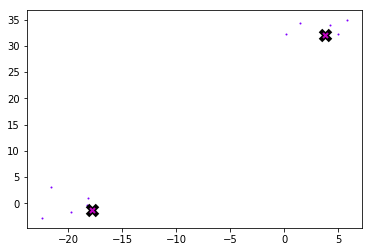

In [5]:
# Data shape
num_samples, num_features = data.shape
num_samples, num_features

# Plot data
plot_data(centroids, data, num_samples)

### Run model

In [6]:
k = K_means(data, 2)

# samples 10, # features 2, # clusters is 2


Initial centroid of cluster 0 is [-18.11180115   0.91689616]
Initial centroid of cluster 1 is [  0.17274699  32.18682098]


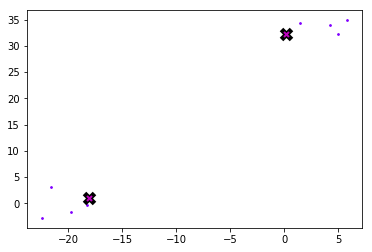

In [7]:
k.initialize_random_centroids()
k.plot()

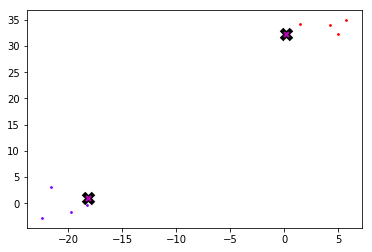

In [8]:
k.assign_to_nearest_centroid()
k.plot()

Centroid of cluster 0 from [-18.11180115   0.91689616] to [-20.01722717  -0.18573613]
Centroid of cluster 1 from [  0.17274699  32.18682098] to [  3.32846451  33.48730469]


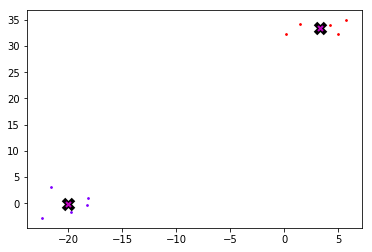

In [9]:
k.centroids = k.compute_centroids()
k.plot()

Initial centroid of cluster 0 is [  4.23639488  33.90189743]
Initial centroid of cluster 1 is [-21.57008934   3.03873301]


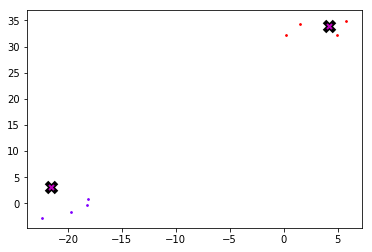

Centroid of cluster 0 from [  4.23639488  33.90189743] to [  3.32846451  33.48730469]
Centroid of cluster 1 from [-21.57008934   3.03873301] to [-20.01722717  -0.18573613]


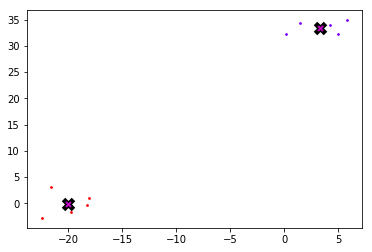

Centroid of cluster 0 from [  3.32846451  33.48730469] to [  3.32846451  33.48730469]
Centroid of cluster 1 from [-20.01722717  -0.18573613] to [-20.01722717  -0.18573613]
Centroids converged!


In [10]:
k.fit(iterations = 10, show_plot = True)

## Demo on larger dataset and 2 clusters

### Create dataset

In [11]:
num_clusters = 2
num_samples = 250
centroids = np.random.uniform(-35, 35, (num_clusters, 2))
slices = [np.random.multivariate_normal(centroids[i], np.diag([5., 5.]), num_samples)
           for i in range(num_clusters)]
data = np.concatenate(slices).astype(np.float32)

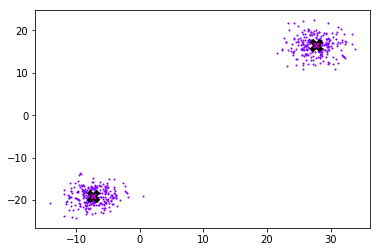

In [12]:
# Data shape
num_samples, num_features = data.shape
num_samples, num_features

# Plot data
plot_data(centroids, data, num_samples)

### Run model

In [13]:
k = K_means(data, 2)

# samples 500, # features 2, # clusters is 2


Initial centroid of cluster 0 is [ 30.20817375  19.34165955]
Initial centroid of cluster 1 is [ 26.67064857  20.13094139]


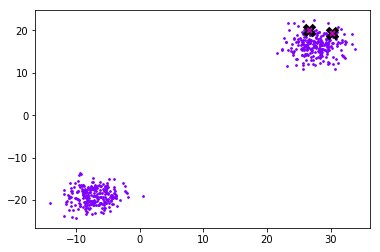

Centroid of cluster 0 from [ 30.20817375  19.34165955] to [ 29.48857307  16.05180931]
Centroid of cluster 1 from [ 26.67064857  20.13094139] to [ 3.93836117 -6.88309908]


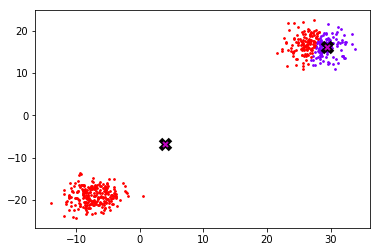

Centroid of cluster 0 from [ 29.48857307  16.05180931] to [ 27.63891602  16.48790169]
Centroid of cluster 1 from [ 3.93836117 -6.88309908] to [ -7.29369497 -19.0618782 ]


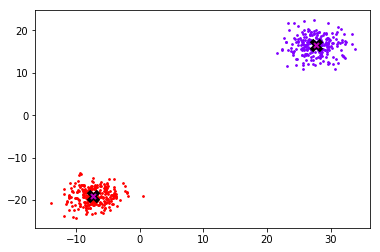

Centroid of cluster 0 from [ 27.63891602  16.48790169] to [ 27.63891602  16.48790169]
Centroid of cluster 1 from [ -7.29369497 -19.0618782 ] to [ -7.29369497 -19.0618782 ]
Centroids converged!


In [14]:
k.fit(iterations = 10, show_plot = True)

## Demo on larger dataset and 6 clusters

### Create dataset

In [15]:
num_clusters = 6
num_samples = 250
centroids = np.random.uniform(-35, 35, (num_clusters, 2))
slices = [np.random.multivariate_normal(centroids[i], np.diag([5., 5.]), num_samples)
           for i in range(num_clusters)]
data = np.concatenate(slices).astype(np.float32)

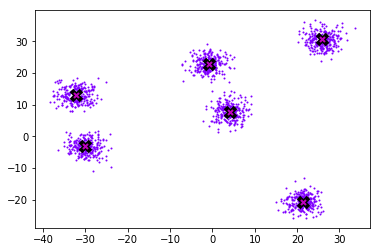

In [16]:
# Data shape
num_samples, num_features = data.shape
num_samples, num_features

# Plot data
plot_data(centroids, data, num_samples)

### Run model

In [33]:
k = K_means(data, 6)

# samples 1500, # features 2, # clusters is 6


Initial centroid of cluster 0 is [-34.7328949   12.56850624]
Initial centroid of cluster 1 is [ -0.27998394  22.32137299]
Initial centroid of cluster 2 is [  4.01497364  11.06707954]
Initial centroid of cluster 3 is [ 5.84284687  8.40687847]
Initial centroid of cluster 4 is [-30.43876839  -0.57805002]
Initial centroid of cluster 5 is [ 25.84813881  29.19665909]


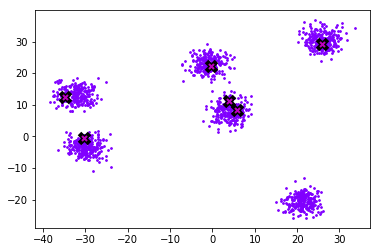

Centroid of cluster 0 from [-34.7328949   12.56850624] to [-32.20930481  13.14590549]
Centroid of cluster 1 from [ -0.27998394  22.32137299] to [ -0.99011868  22.95556831]
Centroid of cluster 2 from [  4.01497364  11.06707954] to [  2.88497257  10.25102234]
Centroid of cluster 3 from [ 5.84284687  8.40687847] to [ 14.60081291  -9.76840305]
Centroid of cluster 4 from [-30.43876839  -0.57805002] to [-30.01705933  -3.29423046]
Centroid of cluster 5 from [ 25.84813881  29.19665909] to [ 25.87692451  30.44779015]


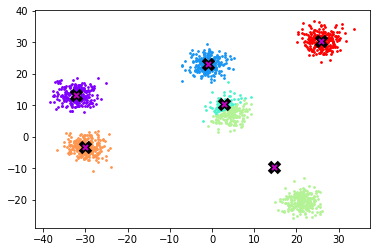

Centroid of cluster 0 from [-32.20930481  13.14590549] to [-32.20930481  13.14590549]
Centroid of cluster 1 from [ -0.99011868  22.95556831] to [ -0.99011868  22.95556831]
Centroid of cluster 2 from [  2.88497257  10.25102234] to [ 3.98061419  7.87018013]
Centroid of cluster 3 from [ 14.60081291  -9.76840305] to [ 21.23324966 -20.59085464]
Centroid of cluster 4 from [-30.01705933  -3.29423046] to [-30.01705933  -3.29423046]
Centroid of cluster 5 from [ 25.87692451  30.44779015] to [ 25.87692451  30.44779015]


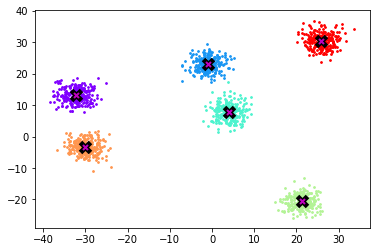

Centroid of cluster 0 from [-32.20930481  13.14590549] to [-32.20930481  13.14590549]
Centroid of cluster 1 from [ -0.99011868  22.95556831] to [ -0.9708218   22.93285751]
Centroid of cluster 2 from [ 3.98061419  7.87018013] to [ 3.98120022  7.83254957]
Centroid of cluster 3 from [ 21.23324966 -20.59085464] to [ 21.23324966 -20.59085464]
Centroid of cluster 4 from [-30.01705933  -3.29423046] to [-30.01705933  -3.29423046]
Centroid of cluster 5 from [ 25.87692451  30.44779015] to [ 25.87692451  30.44779015]


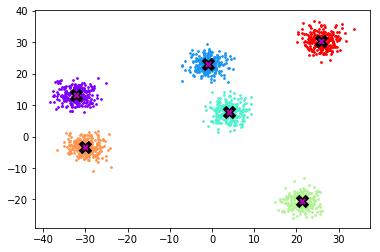

Centroid of cluster 0 from [-32.20930481  13.14590549] to [-32.20930481  13.14590549]
Centroid of cluster 1 from [ -0.9708218   22.93285751] to [ -0.9708218   22.93285751]
Centroid of cluster 2 from [ 3.98120022  7.83254957] to [ 3.98120022  7.83254957]
Centroid of cluster 3 from [ 21.23324966 -20.59085464] to [ 21.23324966 -20.59085464]
Centroid of cluster 4 from [-30.01705933  -3.29423046] to [-30.01705933  -3.29423046]
Centroid of cluster 5 from [ 25.87692451  30.44779015] to [ 25.87692451  30.44779015]
Centroids converged!


In [34]:
k.fit(iterations = 10, show_plot = True)